In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Series/international-airline-passengers.csv')
series = df['Count']

### Разложение на компоненты вручную

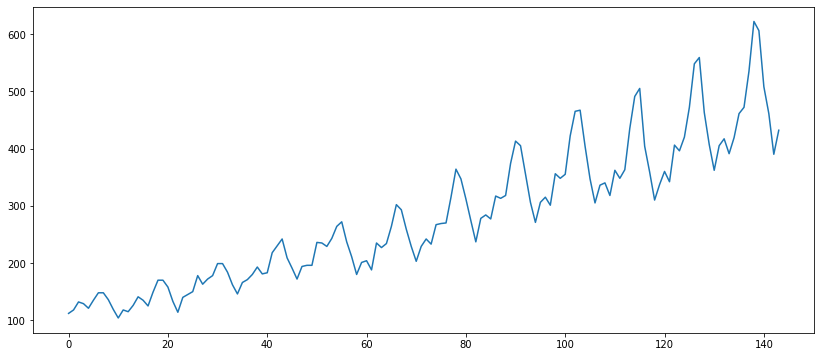

In [3]:
plt.figure(figsize=(14,6))
plt.plot(series)

#### Матрица траекторий

In [4]:
N = len(series)
N

144

In [5]:
L = 50
K = N - L + 1

In [6]:
X = np.column_stack([series[i:i+L] for i in range(0, K)])

#### Разложение

In [7]:
U, Sigma, V = np.linalg.svd(X)
V = V.T

In [8]:
rank = np.linalg.matrix_rank(X)

#### Получение элементарных матриц компонент

In [9]:
X_elem = np.array([Sigma[i]*np.outer(U[:,i], V[:,i]) for i in range(0, rank)])

#### Посмотрим на график 

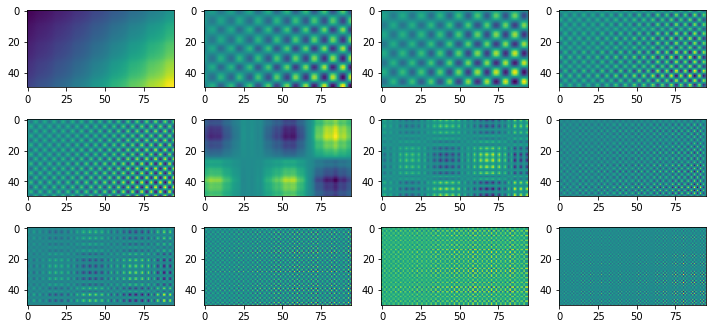

In [10]:
plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(X_elem[i])
plt.tight_layout()

1. 0 - тренд
2. 1 и 2 - первая компонента сезонности
3. 3 и 4 - вторая компонента сезонности
4. 6, 7 и 8 - третья компонента сезонности 

#### Воссатановим времянные ряды из элементарных матриц компонентов

In [11]:
def x_to_TS(matrix):
    x_rev = matrix[::-1]
    return np.array([x_rev.diagonal(i).mean() for i in range(-matrix.shape[0]+1, matrix.shape[1])])

In [12]:
trend = x_to_TS(X_elem[0])
period_1 = x_to_TS(X_elem[[1, 2]].sum(axis=0))
period_2 = x_to_TS(X_elem[[3, 4]].sum(axis=0))
period_3 = x_to_TS(X_elem[[6, 7, 8]].sum(axis=0))
solution = trend + period_1 + period_2 + period_3

#### Визуализируем результат

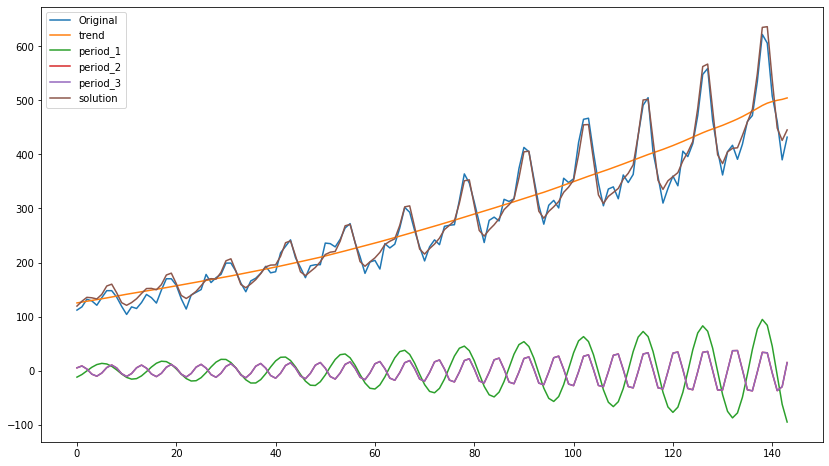

In [13]:
plt.figure(figsize=(14,8))
plt.plot(series, label='Original')
plt.plot(trend, label='trend')
plt.plot(period_1, label='period_1')
plt.plot(period_2, label='period_2')
plt.plot(period_2, label='period_3')
plt.plot(solution, label='solution')
plt.legend()

#### Посмотрим на связи компонент

In [14]:
w = np.array(list(np.arange(L)+1) + [L]*(K-L-1) + list(np.arange(L)+1)[::-1])
w

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 48, 47, 46, 45, 44, 43,
       42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26,
       25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1])

In [15]:
F_elem = np.array([x_to_TS(X_elem[i]) for i in range(rank)])

F_wnorms = np.array([w.dot(F_elem[i]**2) for i in range(rank)])
F_wnorms = F_wnorms**-0.5

Wcorr = np.identity(rank)
for i in range(rank):
    for j in range(i+1,rank):
        Wcorr[i,j] = abs(w.dot(F_elem[i]*F_elem[j]) * F_wnorms[i] * F_wnorms[j])
        Wcorr[j,i] = Wcorr[i,j]

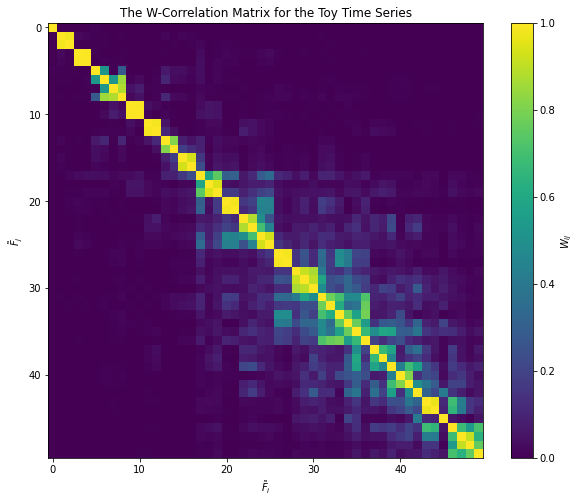

In [16]:
plt.rcParams['figure.figsize'] = (10,8)
ax = plt.imshow(Wcorr)
plt.xlabel(r"$\tilde{F}_i$")
plt.ylabel(r"$\tilde{F}_j$")
plt.colorbar(ax.colorbar, fraction=0.045)
ax.colorbar.set_label("$W_{ij}$")
plt.clim(0,1)
plt.title("The W-Correlation Matrix for the Toy Time Series");

### Поработает с готовым решеним SSA

In [17]:
# Вынес SSA в отдельный файл
from SSA import SSA

In [18]:
ssa = SSA(series, L)

In [19]:
ssa_trend = ssa.reconstruct([0])
ssa_period_1 = ssa.reconstruct([1, 2])
ssa_period_2 = ssa.reconstruct([3, 4])
ssa_period_3 = ssa.reconstruct([6, 7, 8])
ssa_solution = ssa.reconstruct([0,1,2,3,4,6,7,8])

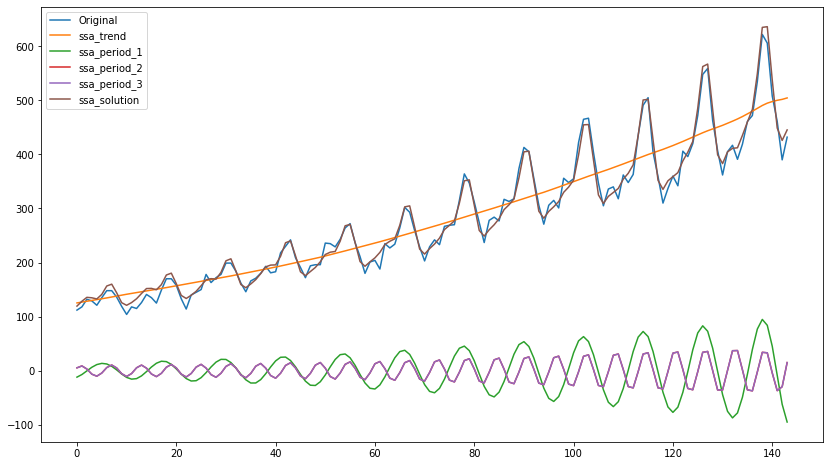

In [20]:
plt.figure(figsize=(14,8))
plt.plot(series, label='Original')
plt.plot(ssa_trend, label='ssa_trend')
plt.plot(ssa_period_1, label='ssa_period_1')
plt.plot(ssa_period_2, label='ssa_period_2')
plt.plot(ssa_period_2, label='ssa_period_3')
plt.plot(ssa_solution, label='ssa_solution')
plt.legend()

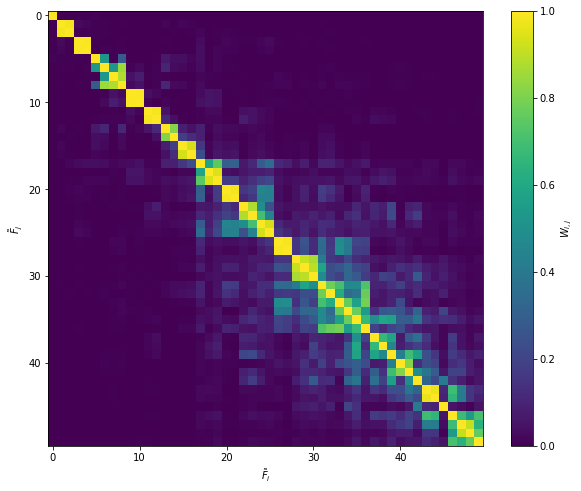

In [22]:
ssa.plot_wcorr()